In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [17]:
merged_df = pd.read_csv('merged_df.csv')
merged_df = merged_df.fillna(0)


In [18]:
merged_df

,player_id,value_2018,value_2019,value_2020,value_2021,value_2022,value_2023,value_2024,goals_2018,goals_2019,...,country_of_citizenship,name,injuries_2019.0,injuries_2020.0,injuries_2021.0,injuries_2022.0,injuries_2023.0,injuries_2024.0,country_of_citizenship_encoded,sub_position_encoded
0,3333,15000000.0,15000000.0,8000000.0,3000000.0,2000000.0,1500000.0,1000000.0,7.0,4.0,...,England,James Milner,1.0,6.0,3.0,2.0,1.0,0.0,37,1
1,4391,600000.0,300000.0,250000.0,200000.0,100000.0,75000.0,50000.0,0.0,0.0,...,Netherlands,Boy Waterman,0.0,0.0,0.0,1.0,0.0,0.0,81,5
2,9500,2000000.0,1500000.0,500000.0,250000.0,250000.0,200000.0,50000.0,0.0,0.0,...,Scotland,David Marshall,0.0,0.0,1.0,0.0,1.0,0.0,98,5
3,12029,500000.0,500000.0,250000.0,250000.0,100000.0,100000.0,100000.0,1.0,0.0,...,France,Ludovic Butelle,0.0,0.0,0.0,0.0,0.0,0.0,41,5
4,12359,250000.0,500000.0,250000.0,200000.0,200000.0,100000.0,75000.0,0.0,0.0,...,Finland,Niki Mäenpää,0.0,0.0,3.0,2.0,2.0,0.0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,552057,200000.0,7500000.0,12000000.0,19000000.0,20000000.0,18000000.0,18000000.0,0.0,1.0,...,Czech Republic,Adam Hlozek,1.0,3.0,2.0,0.0,1.0,0.0,31,12
4474,564785,400000.0,1000000.0,2000000.0,6000000.0,8500000.0,7500000.0,8000000.0,0.0,0.0,...,Norway,Kristian Thorstvedt,0.0,2.0,1.0,0.0,1.0,0.0,87,0
4475,585339,250000.0,500000.0,750000.0,1200000.0,1500000.0,700000.0,1000000.0,0.0,0.0,...,Senegal,Pape Habib Guèye,0.0,0.0,1.0,0.0,0.0,0.0,99,3
4476,551505,1500000.0,2000000.0,2000000.0,1500000.0,1800000.0,6000000.0,8000000.0,0.0,0.0,...,Jordan,Mousa Tamari,0.0,0.0,0.0,0.0,1.0,0.0,63,10


In [19]:
merged_df.columns

Index(['player_id', 'value_2018', 'value_2019', 'value_2020', 'value_2021',
       'value_2022', 'value_2023', 'value_2024', 'goals_2018', 'goals_2019',
       'goals_2020', 'goals_2021', 'goals_2022', 'goals_2023', 'goals_2024',
       'assists_2018', 'assists_2019', 'assists_2020', 'assists_2021',
       'assists_2022', 'assists_2023', 'assists_2024', 'days_until_expiration',
       'minutes_2019', 'minutes_2020', 'minutes_2021', 'minutes_2022',
       'minutes_2023', 'minutes_2024', 'sub_position',
       'country_of_citizenship', 'name', 'injuries_2019.0', 'injuries_2020.0',
       'injuries_2021.0', 'injuries_2022.0', 'injuries_2023.0',
       'injuries_2024.0', 'country_of_citizenship_encoded',
       'sub_position_encoded'],
      dtype='object')

### Linear Regression

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming merged_df is already defined
# Step 1: Keep only columns up to 2021 and the target column (value_2024)
columns_to_keep = [col for col in merged_df.columns if '2023' not in col and '2024' not in col and '2018' not in col]
columns_to_keep.append('value_2024')  # Add target column
filtered_df = merged_df[columns_to_keep]

# Step 2: Define features (X) and target (y)
# Drop 'value_2024' and 'player_id' from features (X)
X = filtered_df.drop(columns=['sub_position', 'country_of_citizenship','name','value_2024', 'player_id', 'minutes_2019', 'minutes_2020', 'minutes_2021','minutes_2022'])  # Drop target and non-predictive column
y = filtered_df['value_2024']



In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)  # Ensure predictions are non-negative

# Convert y_pred to a Pandas Series with the same index as y_test
y_pred_series = pd.Series(y_pred, index=y_test.index)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred_series)
r2 = r2_score(y_test, y_pred_series)

print(f"Linear Regression - R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the equation
equation = f"value_2024 = {intercept:.4f} "  # Start with intercept
for feature, coef in zip(X.columns, coefficients):
    equation += f"+ ({coef:.4f} * {feature}) "

print("Linear Regression Equation:")
print(equation)

# Step 7: Cross-Validation for R²
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores: {cv_r2_scores}")
print(f"Mean Cross-Validated R²: {np.mean(cv_r2_scores):.4f}")

# Step 8: Directional Accuracy Calculation
def directional_accuracy(y_true, y_pred):
    # Compare the sign of changes in true and predicted values
    return np.mean(np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))) * 100

# Step 9: Manual Cross-Validation for Directional Accuracy
kf = KFold(n_splits=5, shuffle=True, random_state=42)
directional_accuracies = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)

    # Ensure predictions are non-negative
    y_pred_cv = np.maximum(y_pred_cv, 0)

    acc = directional_accuracy(y_test_cv.values, y_pred_cv)
    directional_accuracies.append(acc)

print(f"Directional Accuracy Scores (Cross-Validated): {directional_accuracies}")
print(f"Mean Directional Accuracy (Cross-Validated): {np.mean(directional_accuracies):.2f}%")


Linear Regression - R-squared: 0.8022123056659329
Mean Squared Error: 26067059345102.24
Linear Regression Equation:
value_2024 = -407216.9360 + (-0.0254 * value_2019) + (-0.1103 * value_2020) + (-0.2458 * value_2021) + (1.2367 * value_2022) + (-38791.6591 * goals_2019) + (-51178.3840 * goals_2020) + (-196047.4672 * goals_2021) + (293446.0921 * goals_2022) + (-50449.4815 * assists_2019) + (45237.2403 * assists_2020) + (-123532.0330 * assists_2021) + (18358.2392 * assists_2022) + (3689.3714 * days_until_expiration) + (-184777.2759 * injuries_2019.0) + (-3545.4532 * injuries_2020.0) + (114523.1604 * injuries_2021.0) + (-158011.6810 * injuries_2022.0) + (-3939.0012 * country_of_citizenship_encoded) + (-15581.9725 * sub_position_encoded) 
Cross-Validated R² Scores: [0.42658402 0.69268876 0.76736045 0.82922332 0.77157401]
Mean Cross-Validated R²: 0.6975
Directional Accuracy Scores (Cross-Validated): [76.9832402234637, 76.31284916201118, 77.54189944134077, 74.16107382550335, 75.50335570469798

In [22]:
# Step 7: Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(coefficients)



Feature Coefficients:
                           Feature    Coefficient
7                       goals_2022  312988.883378
11                    assists_2022   97290.838562
14                 injuries_2020.0   78041.272632
15                 injuries_2021.0   67906.238431
5                       goals_2020   21897.362475
12           days_until_expiration    3581.117932
3                       value_2022       1.232318
0                       value_2019      -0.027656
1                       value_2020      -0.149275
2                       value_2021      -0.215447
18            sub_position_encoded   -2450.607268
17  country_of_citizenship_encoded   -3980.442078
4                       goals_2019   -4319.278880
9                     assists_2020  -28008.285801
8                     assists_2019  -89369.491674
16                 injuries_2022.0 -140388.102779
10                    assists_2021 -147640.059993
13                 injuries_2019.0 -206262.700935
6                       goa

### MLP Regressor

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import numpy as np

# Step 1: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train MLP Regressor
model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Step 3: Predictions
y_pred = model.predict(X_test)

# Calculate R² on the test set
test_r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {test_r2:.4f}")

# Directional Accuracy Calculation
def directional_accuracy(y_true, y_pred):
    # Compare the sign of changes in true and predicted values
    return np.mean(np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))) * 100

# Calculate Directional Accuracy on test set
directional_acc = directional_accuracy(y_test.values, y_pred)
print(f"Directional Accuracy on test set: {directional_acc:.2f}%")

# Step 4: Cross-Validation (5-Fold) for R²
cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R² Scores: {cv_r2_scores}")
print(f"Mean Cross-Validated R²: {np.mean(cv_r2_scores):.4f}")

# Step 5: Manual Cross-Validation for Directional Accuracy
kf = KFold(n_splits=5, shuffle=True, random_state=42)
directional_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = directional_accuracy(y_test.values, y_pred)
    directional_accuracies.append(acc)

print(f"Directional Accuracy Scores (Cross-Validated): {directional_accuracies}")
print(f"Mean Directional Accuracy (Cross-Validated): {np.mean(directional_accuracies):.2f}%")


R² on test set: 0.7805
Directional Accuracy on test set: 83.91%
Cross-Validated R² Scores: [0.72487754 0.69848211 0.73814269 0.77919853 0.74954952]
Mean Cross-Validated R²: 0.7381
Directional Accuracy Scores (Cross-Validated): [81.89944134078212, 84.6927374301676, 82.90502793296089, 81.9910514541387, 80.98434004474274]
Mean Directional Accuracy (Cross-Validated): 82.49%


### Model Diagnostics

In [24]:
# Step 6: Create a DataFrame showing actual vs predicted with difference
comparison_df = pd.DataFrame({
    'Actual (y_test)': y_test,
    'Predicted (y_pred)': y_pred
})

# Add a column for the difference (Actual - Predicted)
comparison_df['Difference'] = comparison_df['Actual (y_test)'] - comparison_df['Predicted (y_pred)']

# Optional: Reset index for a clean table
comparison_df.reset_index(drop=True, inplace=True)

# Show the first 20 rows
print(comparison_df.head(20))

# Find the average difference
average_difference = comparison_df['Difference'].astype(float).mean()

# Display the result
print(f"Average Difference: {average_difference:,.2f}")

# Find how many are overestimated (Difference > 0) and underestimated (Difference < 0)
overestimated_count = (comparison_df['Difference'] > 0).sum()
underestimated_count = (comparison_df['Difference'] < 0).sum()

# Display the results
print(f"Number of Overestimated Predictions: {overestimated_count}")
print(f"Number of Underestimated Predictions: {underestimated_count}")


    Actual (y_test)  Predicted (y_pred)    Difference
0           75000.0        1.185840e+05 -4.358398e+04
1          200000.0        9.884894e+04  1.011511e+05
2         1200000.0        3.136068e+06 -1.936068e+06
3         1000000.0        1.089400e+06 -8.940012e+04
4         3000000.0        2.547254e+06  4.527458e+05
5          350000.0        6.030137e+05 -2.530137e+05
6           50000.0        1.050971e+05 -5.509709e+04
7          500000.0        9.786523e+05 -4.786523e+05
8          100000.0        1.611232e+05 -6.112322e+04
9          500000.0        1.333407e+06 -8.334074e+05
10         150000.0        2.215213e+05 -7.152130e+04
11          50000.0        1.503058e+05 -1.003058e+05
12         300000.0        2.752541e+05  2.474586e+04
13         250000.0        3.075260e+05 -5.752599e+04
14         100000.0        3.059870e+04  6.940130e+04
15         100000.0        1.104784e+05 -1.047843e+04
16         100000.0        7.315183e+04  2.684817e+04
17        2000000.0        4

In [25]:
comparison_df

,Actual (y_test),Predicted (y_pred),Difference
0,75000.0,1.185840e+05,-4.358398e+04
1,200000.0,9.884894e+04,1.011511e+05
2,1200000.0,3.136068e+06,-1.936068e+06
3,1000000.0,1.089400e+06,-8.940012e+04
4,3000000.0,2.547254e+06,4.527458e+05
...,...,...,...
890,850000.0,3.179463e+05,5.320537e+05
891,700000.0,1.676146e+06,-9.761456e+05
892,3000000.0,1.166925e+06,1.833075e+06
893,400000.0,4.289145e+05,-2.891451e+04


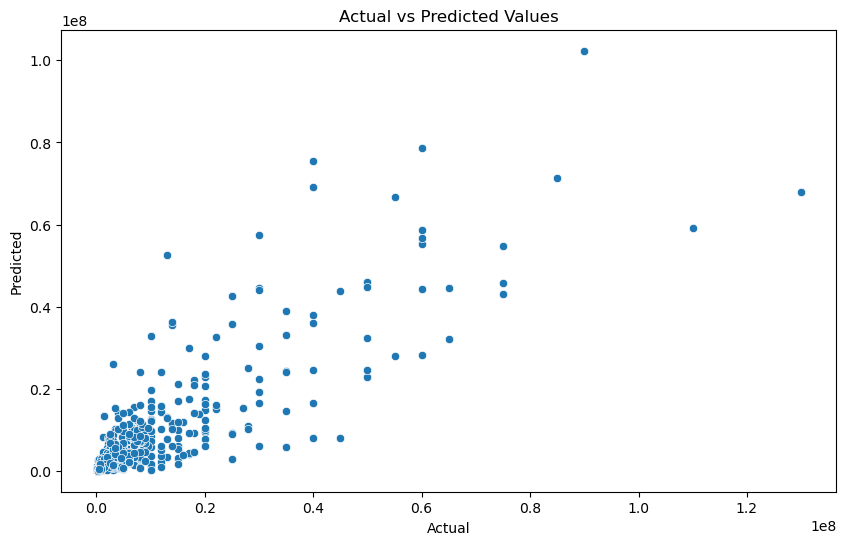

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df['Actual (y_test)'], y=comparison_df['Predicted (y_pred)'])
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


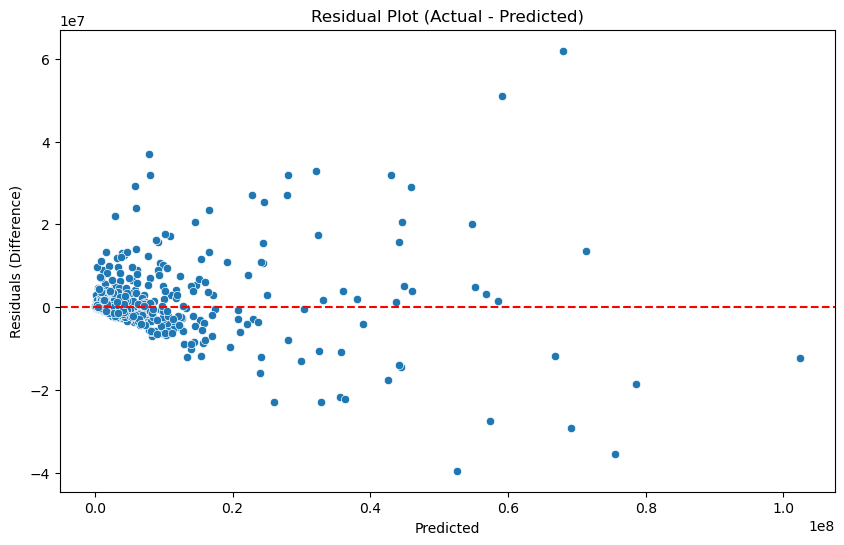

In [27]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=comparison_df['Predicted (y_pred)'], y=comparison_df['Difference'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Predicted')
plt.ylabel('Residuals (Difference)')
plt.show()


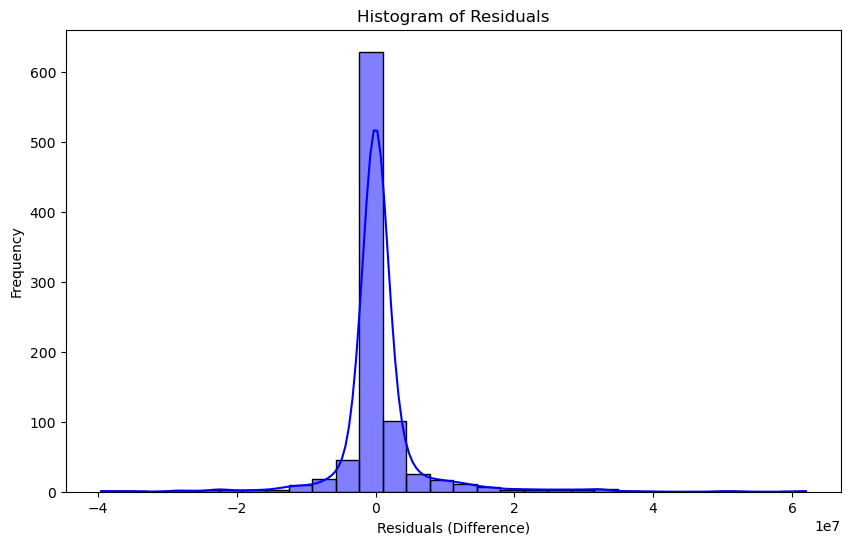

In [28]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['Difference'], bins=30, kde=True, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (Difference)')
plt.ylabel('Frequency')
plt.show()


In [29]:
# Identifying outliers in residuals (e.g., absolute residuals > 2 standard deviations)
residuals = comparison_df['Difference']
std_residuals = residuals.std()
outliers = comparison_df[abs(residuals) > 2 * std_residuals]
print(f"Number of Outliers: {len(outliers)}")


Number of Outliers: 46


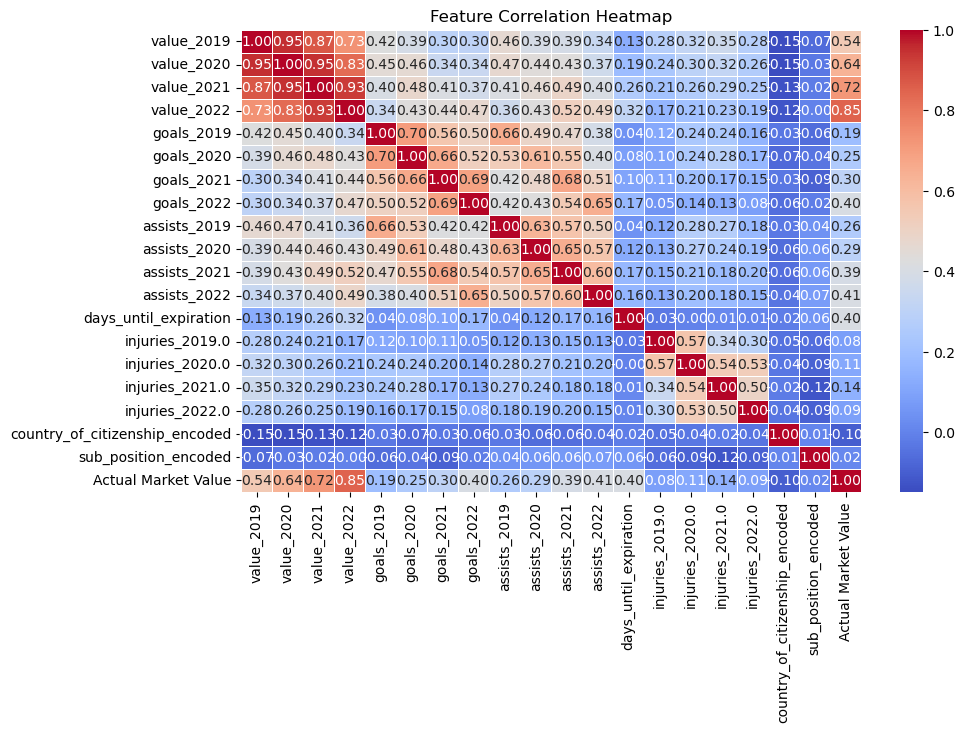

In [30]:
import seaborn as sns
# Combine features and target into a DataFrame
data = pd.concat([X_test, y_test.rename("Actual Market Value")], axis=1)

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [33]:
X.columns.tolist()


['value_2019',
 'value_2020',
 'value_2021',
 'value_2022',
 'goals_2019',
 'goals_2020',
 'goals_2021',
 'goals_2022',
 'assists_2019',
 'assists_2020',
 'assists_2021',
 'assists_2022',
 'days_until_expiration',
 'injuries_2019.0',
 'injuries_2020.0',
 'injuries_2021.0',
 'injuries_2022.0',
 'country_of_citizenship_encoded',
 'sub_position_encoded']

### Saving Model

In [31]:
import joblib

# Save the trained model to a .pkl file
file_path = r"D:\Football Project\ProWorth\football_value_model.pkl"  # Using raw string to handle backslashes
joblib.dump(model, file_path)

print("✅ Model saved as football_value_model.pkl")


✅ Model saved as football_value_model.pkl


In [32]:
merged_df.columns

Index(['player_id', 'value_2018', 'value_2019', 'value_2020', 'value_2021',
       'value_2022', 'value_2023', 'value_2024', 'goals_2018', 'goals_2019',
       'goals_2020', 'goals_2021', 'goals_2022', 'goals_2023', 'goals_2024',
       'assists_2018', 'assists_2019', 'assists_2020', 'assists_2021',
       'assists_2022', 'assists_2023', 'assists_2024', 'days_until_expiration',
       'minutes_2019', 'minutes_2020', 'minutes_2021', 'minutes_2022',
       'minutes_2023', 'minutes_2024', 'sub_position',
       'country_of_citizenship', 'name', 'injuries_2019.0', 'injuries_2020.0',
       'injuries_2021.0', 'injuries_2022.0', 'injuries_2023.0',
       'injuries_2024.0', 'country_of_citizenship_encoded',
       'sub_position_encoded'],
      dtype='object')